In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.ExcelFile('KPMG_M1_not_cleaned.xlsx')

tran = pd.read_excel(data, 'Transactions')
new_cus = pd.read_excel(data, 'NewCustomerList')
dem = pd.read_excel(data, 'CustomerDemographic')
address = pd.read_excel(data, 'CustomerAddress')

# Transactions List

In [3]:
tran.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,140,11,462,2017-01-01,0.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,2016-07-09
1,517,77,311,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,2011-05-09
2,561,65,2298,2017-01-01,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,2010-08-20
3,1293,67,1931,2017-01-01,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
4,1403,0,2891,2017-01-01,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,1993-07-20


In [4]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
tran.duplicated().sum()

0

In [6]:
tran.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [7]:
tran.duplicated().sum()

0

In [8]:
tran.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [9]:
tran.dropna(inplace=True)

In [10]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [11]:
tran['online_order'].value_counts()

1.0    9739
0.0    9706
Name: online_order, dtype: int64

In [12]:
tran['order_status'].value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [13]:
tran['brand'].value_counts()

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

In [14]:
tran['product_line'].value_counts()

Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64

In [15]:
tran['product_class'].value_counts()

medium    13587
high       2952
low        2906
Name: product_class, dtype: int64

In [16]:
tran['product_size'].value_counts()

medium    12767
large      3900
small      2778
Name: product_size, dtype: int64

In [17]:
tran['list_price'].max()

2091.47

In [18]:
tran['list_price'].min()

12.01

In [19]:
tran['standard_cost'].max()

1759.85

In [20]:
tran['standard_cost'].min()

7.21

In [21]:
tran['product_first_sold_date'].min()

Timestamp('1991-01-21 00:00:00')

In [22]:
tran['product_first_sold_date'].max()

Timestamp('2016-12-06 00:00:00')

In [23]:
tran['customer_id'].describe()

count    19445.000000
mean      1739.467267
std       1011.889153
min          1.000000
25%        857.000000
50%       1741.000000
75%       2615.000000
max       5034.000000
Name: customer_id, dtype: float64

# Customer Demographics

In [24]:
dem

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
1,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
2,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
3,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
4,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,NaN,No,NaN
3996,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN
3997,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN
3998,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN


In [25]:
dem.rename(columns = {'past_3_years_bike_related_purchases': '3_yrs_purchases', 'job_industry_category': 'job_industry'}, inplace=True)
dem.replace('Argiculture', 'Agriculture', inplace=True)

dem

,customer_id,first_name,last_name,gender,3_yrs_purchases,DOB,job_title,job_industry,wealth_segment,deceased_indicator,default,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
1,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
2,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
3,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
4,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,NaN,No,NaN
3996,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN
3997,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN
3998,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN


In [26]:
dem.drop(0, axis = 0, inplace = True)
dem

,customer_id,first_name,last_name,gender,3_yrs_purchases,DOB,job_title,job_industry,wealth_segment,deceased_indicator,default,owns_car,tenure
1,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
2,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
3,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
4,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
5,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,NaN,No,NaN
3996,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN
3997,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN
3998,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN


In [27]:
dem.drop(['default'], axis = 1, inplace = True)

In [28]:
dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 3999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         3999 non-null   int64         
 1   first_name          3999 non-null   object        
 2   last_name           3874 non-null   object        
 3   gender              3999 non-null   object        
 4   3_yrs_purchases     3999 non-null   int64         
 5   DOB                 3912 non-null   datetime64[ns]
 6   job_title           3493 non-null   object        
 7   job_industry        3343 non-null   object        
 8   wealth_segment      3999 non-null   object        
 9   deceased_indicator  3999 non-null   object        
 10  owns_car            3999 non-null   object        
 11  tenure              3912 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 406.1+ KB


In [29]:
dem.duplicated().sum()

0

In [30]:
dem.isnull().sum()

customer_id             0
first_name              0
last_name             125
gender                  0
3_yrs_purchases         0
DOB                    87
job_title             506
job_industry          656
wealth_segment          0
deceased_indicator      0
owns_car                0
tenure                 87
dtype: int64

In [31]:
dem.dropna(subset = ['DOB'], inplace = True)
dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 1 to 3912
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         3912 non-null   int64         
 1   first_name          3912 non-null   object        
 2   last_name           3791 non-null   object        
 3   gender              3912 non-null   object        
 4   3_yrs_purchases     3912 non-null   int64         
 5   DOB                 3912 non-null   datetime64[ns]
 6   job_title           3415 non-null   object        
 7   job_industry        3256 non-null   object        
 8   wealth_segment      3912 non-null   object        
 9   deceased_indicator  3912 non-null   object        
 10  owns_car            3912 non-null   object        
 11  tenure              3912 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 397.3+ KB


In [32]:
dem['Age'] = 2022 - dem['DOB'].dt.year
dem['age'] = pd.cut(x = dem['Age'], bins = [0, 20, 40, 60, 80, 100], labels = ['under 20', '20-40', '40-60', '60-80', 'above 80'])

dem.drop(['DOB'], axis = 1, inplace = True)
dem.drop(['Age'], axis = 1, inplace = True)
dem

,customer_id,first_name,last_name,gender,3_yrs_purchases,job_title,job_industry,wealth_segment,deceased_indicator,owns_car,tenure,age
1,720,Darrel,Canet,Male,67,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,above 80
2,1092,Katlin,Creddon,Female,56,VP Quality Control,Retail,Mass Customer,N,No,5.0,above 80
3,3410,Merrili,Brittin,Female,93,NaN,Property,Mass Customer,N,No,16.0,above 80
4,2413,Abbey,Murrow,Male,27,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0,60-80
5,658,Donn,Bonnell,Male,38,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0,60-80
...,...,...,...,...,...,...,...,...,...,...,...,...
3908,422,Vito,Norker,Male,78,NaN,Manufacturing,Affluent Customer,N,No,1.0,under 20
3909,2858,Benedicto,Radki,Male,4,Recruiting Manager,NaN,Mass Customer,N,Yes,1.0,under 20
3910,3435,Stevena,Allcock,Female,80,Senior Editor,NaN,Affluent Customer,N,No,1.0,under 20
3911,1888,Sibyl,Scholtz,Female,67,Food Chemist,Health,Mass Customer,N,Yes,1.0,under 20


In [33]:
values = {'last_name': ' '}
dem.fillna(value = values, inplace = True)
dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 1 to 3912
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_id         3912 non-null   int64   
 1   first_name          3912 non-null   object  
 2   last_name           3912 non-null   object  
 3   gender              3912 non-null   object  
 4   3_yrs_purchases     3912 non-null   int64   
 5   job_title           3415 non-null   object  
 6   job_industry        3256 non-null   object  
 7   wealth_segment      3912 non-null   object  
 8   deceased_indicator  3912 non-null   object  
 9   owns_car            3912 non-null   object  
 10  tenure              3912 non-null   float64 
 11  age                 3912 non-null   category
dtypes: category(1), float64(1), int64(2), object(8)
memory usage: 370.8+ KB


In [34]:
dem.dropna(subset = ['job_industry'], inplace = True)
dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3256 entries, 1 to 3912
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_id         3256 non-null   int64   
 1   first_name          3256 non-null   object  
 2   last_name           3256 non-null   object  
 3   gender              3256 non-null   object  
 4   3_yrs_purchases     3256 non-null   int64   
 5   job_title           2864 non-null   object  
 6   job_industry        3256 non-null   object  
 7   wealth_segment      3256 non-null   object  
 8   deceased_indicator  3256 non-null   object  
 9   owns_car            3256 non-null   object  
 10  tenure              3256 non-null   float64 
 11  age                 3256 non-null   category
dtypes: category(1), float64(1), int64(2), object(8)
memory usage: 308.6+ KB


In [35]:
dem['job_industry'].unique()

array(['Retail', 'Property', 'Manufacturing', 'Health', 'IT',
       'Entertainment', 'Financial Services', 'Agriculture',
       'Telecommunications'], dtype=object)

In [36]:
dem['gender'].value_counts()

Female    1688
Male      1566
F            1
Femal        1
Name: gender, dtype: int64

In [37]:
dem.replace('F', 'Female', inplace = True)
dem.replace('Femal', 'Female', inplace = True)
dem.replace('M', 'Male', inplace = True)

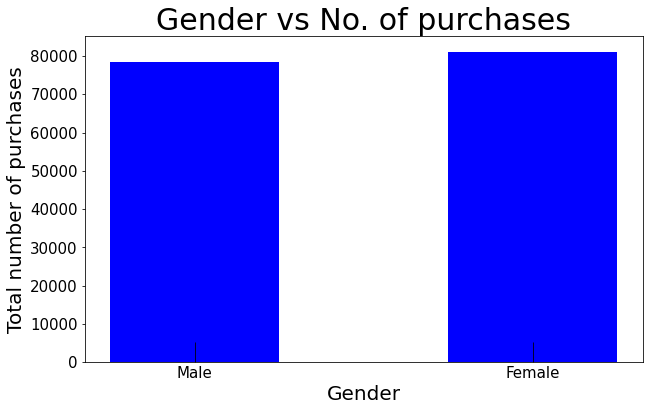

In [38]:
dem1 = dem.groupby('gender')

purchases = []
genders = ['Male', 'Female']

for gen in genders:
    purchases.append(dem1.get_group(gen)['3_yrs_purchases'].sum())

fig = plt.figure(figsize = (10, 6))
plt.bar(genders, purchases, color = 'blue', width = 0.5)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Total number of purchases', fontsize=20)
plt.tick_params(axis='x', direction='in', length=20)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.title('Gender vs No. of purchases', fontsize = 30);


In [39]:
def myfun(col1, col2):
    dem1 = dem.groupby([col1, col2])
    purchases = []
    arr1 = list(dem[col1].unique())
    arr2 = list(dem[col2].unique())

    if(col2 == 'owns_car'):
        arr2.reverse()

    arr1.reverse()

    for x in arr2:
        temp = []

        for y in arr1:
            try:
                temp.append(dem1.get_group((y, x))['3_yrs_purchases'].sum())

            except KeyError:
                temp.append(0)
                continue

        purchases.append(temp)

    return (np.array(purchases), arr1)


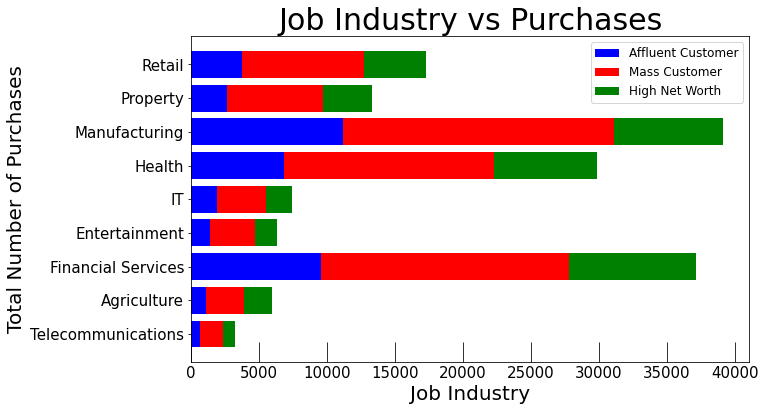

In [40]:
purchases, job_ind = myfun('job_industry', 'wealth_segment')

fig = plt.figure(figsize = (10, 6))
plt.barh(job_ind, purchases[0], color = 'blue')
plt.barh(job_ind, purchases[1], left = purchases[0], color = 'red')
plt.barh(job_ind, purchases[2], left = purchases[0] + purchases[1], color = 'green')
plt.xlabel('Job Industry', fontsize=20)
plt.ylabel('Total Number of Purchases', fontsize=20)
plt.legend(['Affluent Customer', 'Mass Customer', 'High Net Worth'], fontsize=12)
plt.tick_params(axis='x', direction='in', length=20)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.title('Job Industry vs Purchases', fontsize = 30);

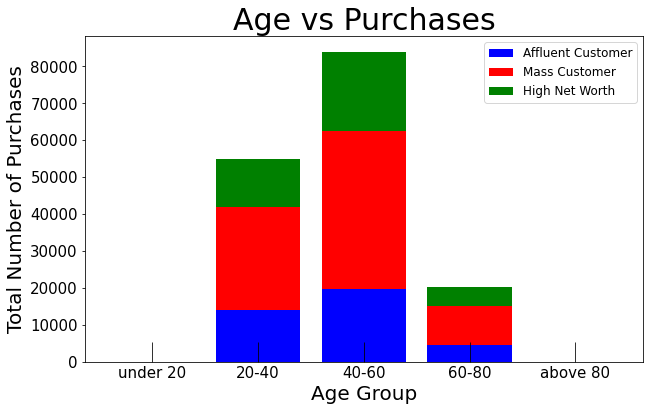

In [41]:
purchases, ages = myfun('age', 'wealth_segment')

fig = plt.figure(figsize = (10, 6))
plt.bar(ages, purchases[0], color = 'blue')
plt.bar(ages, purchases[1], bottom = purchases[0], color = 'red')
plt.bar(ages, purchases[2], bottom = purchases[0] + purchases[1], color = 'green')
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('Total Number of Purchases', fontsize=20)
plt.legend(['Affluent Customer', 'Mass Customer', 'High Net Worth'], fontsize=12)
plt.tick_params(axis = 'x', direction = 'in', length=20)
plt.xticks(fontsize = '15')
plt.yticks(fontsize = '15')
plt.title('Age vs Purchases', fontsize = 30);

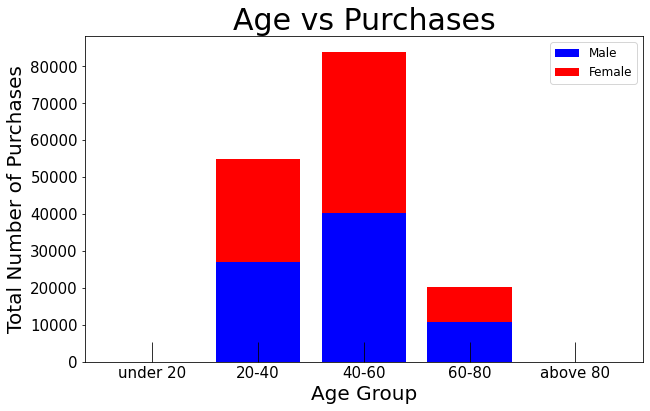

In [42]:
purchases, ages = myfun('age', 'gender')

fig = plt.figure(figsize = (10, 6))
plt.bar(ages, purchases[0], color = 'blue')
plt.bar(ages, purchases[1], bottom = purchases[0], color = 'red')
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('Total Number of Purchases', fontsize=20)
plt.legend(['Male', 'Female'], fontsize=12)
plt.tick_params(axis = 'x', direction = 'in', length=20)
plt.xticks(fontsize = '15')
plt.yticks(fontsize = '15')
plt.title('Age vs Purchases', fontsize = 30);

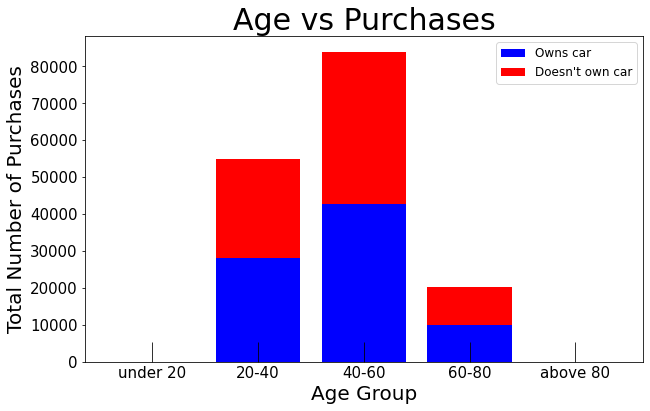

In [43]:
purchases, age = myfun('age', 'owns_car')

fig = plt.figure(figsize = (10, 6))
plt.bar(ages, purchases[0], color = 'blue')
plt.bar(ages, purchases[1], bottom = purchases[0], color = 'red')
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('Total Number of Purchases', fontsize=20)
plt.legend(['Owns car', 'Doesn\'t own car'], fontsize=12)
plt.tick_params(axis = 'x', direction = 'in', length=20)
plt.xticks(fontsize = '15')
plt.yticks(fontsize = '15')
plt.title('Age vs Purchases', fontsize = 30);

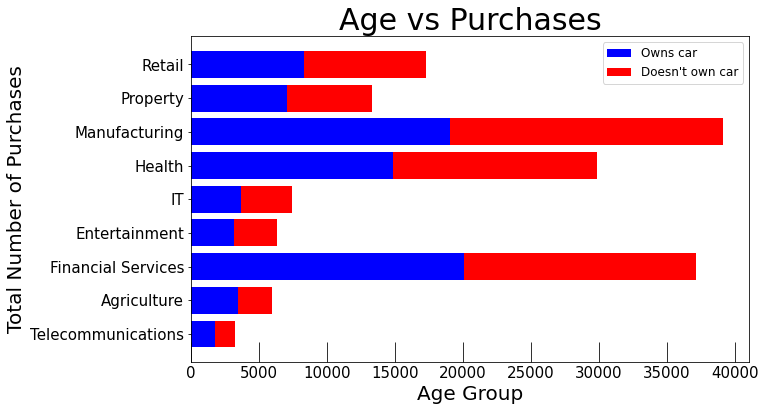

In [44]:
purchases, job_ind = myfun('job_industry', 'owns_car')

fig = plt.figure(figsize = (10, 6))
plt.barh(job_ind, purchases[0], color = 'blue')
plt.barh(job_ind, purchases[1], left = purchases[0], color = 'red')
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('Total Number of Purchases', fontsize=20)
plt.legend(['Owns car', 'Doesn\'t own car'], fontsize=12)
plt.tick_params(axis = 'x', direction = 'in', length=20)
plt.xticks(fontsize = '15')
plt.yticks(fontsize = '15')
plt.title('Age vs Purchases', fontsize = 30);

In [45]:
dem['gender'].value_counts()

Female    1690
Male      1566
Name: gender, dtype: int64

In [46]:
dem['wealth_segment'].value_counts()

Mass Customer        1636
High Net Worth        826
Affluent Customer     794
Name: wealth_segment, dtype: int64

In [47]:
dem['deceased_indicator'].value_counts()

N    3254
Y       2
Name: deceased_indicator, dtype: int64

In [48]:
dem['owns_car'].value_counts()

Yes    1659
No     1597
Name: owns_car, dtype: int64

In [49]:
print(dem['tenure'].min())
print(dem['tenure'].max())

1.0
22.0


# Customer Addresses

In [50]:
address

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [51]:
address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [52]:
address.replace('Victoria', 'VIC', inplace=True)
address.replace('New South Wales', 'NSW', inplace=True)

address['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [53]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


### Removing the data entries which are not common to addresses and demographics table

In [54]:
dem['customer_id'].unique().__contains__(10)

True

#### Ensuring customer IDs 3, 10, 22, 23 are not there in demographics table as they are not there in addresses table

In [55]:
dem[dem['customer_id'] == 3]

,customer_id,first_name,last_name,gender,3_yrs_purchases,job_title,job_industry,wealth_segment,deceased_indicator,owns_car,tenure,age
28,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,60-80


In [56]:
dem[dem['customer_id'] == 10]

,customer_id,first_name,last_name,gender,3_yrs_purchases,job_title,job_industry,wealth_segment,deceased_indicator,owns_car,tenure,age
3055,10,Fiorenze,Birdall,Female,49,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,20-40


In [57]:
dem[dem['customer_id'] == 22]

,customer_id,first_name,last_name,gender,3_yrs_purchases,job_title,job_industry,wealth_segment,deceased_indicator,owns_car,tenure,age
614,22,Deeanne,Durtnell,Female,79,NaN,IT,Mass Customer,N,No,11.0,40-60


In [58]:
dem.drop([28, 614, 3055], axis = 0, inplace = True)

#### Ensuring customer IDs 4001-3 are not there in the addresses table as they are not there in the demographics table

In [59]:
address.tail(5)

,customer_id,address,postcode,state,country,property_valuation
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7
3998,4003,320 Acker Drive,2251,NSW,Australia,7


In [60]:
address.drop(range(3996,3999,1) ,axis = 0, inplace = True)

In [61]:
address.tail(5)

,customer_id,address,postcode,state,country,property_valuation
3991,3996,0 Transport Center,3977,VIC,Australia,6
3992,3997,4 Dovetail Crossing,2350,NSW,Australia,2
3993,3998,736 Roxbury Junction,2540,NSW,Australia,6
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6


# Joining addresses and demographics table

In [62]:
dem_add = pd.merge(dem, address, how='left', on='customer_id')
merged1 = dem_add.groupby('customer_id')
merged1.first()

,first_name,last_name,gender,3_yrs_purchases,job_title,job_industry,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,60-80,060 Morning Avenue,2016,NSW,Australia,10
2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40-60,6 Meadow Vale Court,2153,NSW,Australia,10
4,Talbot,,Male,33,None,IT,Mass Customer,N,No,7.0,60-80,0 Holy Cross Court,4211,QLD,Australia,9
6,Curr,Duckhouse,Male,35,None,Retail,High Net Worth,N,Yes,13.0,40-60,9 Oakridge Court,3216,VIC,Australia,9
7,Fina,Merali,Female,6,None,Financial Services,Affluent Customer,N,Yes,11.0,40-60,4 Delaware Trail,2210,NSW,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,Stephie,Byars,Female,5,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12.0,20-40,2918 Summer Ridge Hill,3030,VIC,Australia,2
3995,Rusty,Iapico,Male,93,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0,40-60,613 Erie Lane,2088,NSW,Australia,12
3996,Rosalia,Halgarth,Female,8,VP Product Management,Health,Mass Customer,N,No,19.0,40-60,0 Transport Center,3977,VIC,Australia,6


In [63]:
dem_add['state'].value_counts()

NSW    1741
VIC     836
QLD     676
Name: state, dtype: int64

In [64]:
def myfun(col1, col2):
    dem1 = dem_add.groupby([col1, col2])
    purchases = []
    arr1 = list(dem_add[col1].unique())
    arr2 = list(dem_add[col2].unique())

    if(col2 == 'owns_car'):
        arr2.reverse()

    arr1.reverse()

    for x in arr2:
        temp = []

        for y in arr1:
            try:
                temp.append(dem1.get_group((y, x))['3_yrs_purchases'].sum())

            except KeyError:
                temp.append(0)
                continue

        purchases.append(temp)

    return (np.array(purchases), arr1)


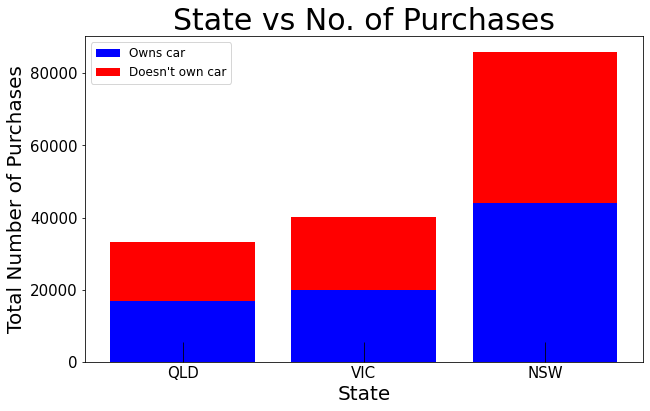

In [65]:
purchases, state = myfun('state', 'owns_car')

fig = plt.figure(figsize = (10, 6))
plt.bar(state, purchases[0], color = 'blue')
plt.bar(state, purchases[1], bottom = purchases[0], color = 'red')
plt.xlabel('State', fontsize=20)
plt.ylabel('Total Number of Purchases', fontsize=20)
plt.legend(['Owns car', 'Doesn\'t own car'], fontsize=12)
plt.tick_params(axis = 'x', direction = 'in', length=20)
plt.xticks(fontsize = '15')
plt.yticks(fontsize = '15')
plt.title('State vs No. of Purchases', fontsize = 30);

# New Customer List

In [66]:
new_cus.head(10)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Anthony,Morison,Male,7,1938-06-08,General Manager,Health,Mass Customer,N,No,12,276 Derek Circle,2759,NSW,Australia,9,797,0.600000
1,Zachariah,Meininking,Male,40,1938-06-09,Cost Accountant,Financial Services,Affluent Customer,N,Yes,20,24815 Lindbergh Avenue,2749,NSW,Australia,7,883,0.531250
2,Andrea,Pendle,Female,86,1938-08-05,NaN,NaN,High Net Worth,N,Yes,13,31281 Meadow Valley Way,4500,QLD,Australia,6,760,0.637500
3,Letizia,Poore,Female,27,1938-08-30,Web Developer II,Manufacturing,Affluent Customer,N,No,15,95796 Mcbride Drive,3677,VIC,Australia,3,583,0.787500
4,Alleen,Eaken,Female,56,1938-08-31,NaN,NaN,Mass Customer,N,No,10,343 Lakewood Center,2089,NSW,Australia,12,259,1.062500
5,Willard,Booton,Male,69,1938-09-02,NaN,Health,High Net Worth,N,Yes,7,05 Ronald Regan Alley,2121,NSW,Australia,9,688,0.697000
6,Wyn,Meach,Male,37,1938-09-10,NaN,Manufacturing,Mass Customer,N,No,9,79 Armistice Junction,2765,NSW,Australia,9,415,0.921875
7,Franklin,Wohler,Male,55,1938-10-16,Clinical Specialist,Health,Mass Customer,N,Yes,7,6966 Delladonna Street,2250,NSW,Australia,8,191,1.150000
8,Odilia,Quick,Female,65,1938-11-09,General Manager,Manufacturing,Affluent Customer,N,Yes,11,1550 Russell Way,2222,NSW,Australia,11,19,1.531250
9,Kippar,Brimilcome,Male,21,1938-11-29,Graphic Designer,Health,Mass Customer,N,No,19,082 Welch Lane,2089,NSW,Australia,11,405,0.930000


In [67]:
new_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [68]:
new_cus.duplicated().sum()

0

In [69]:
new_cus.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [70]:
new_cus.dropna(subset = ['DOB', 'job_title', 'job_industry_category'], inplace = True)
values = {'last_name':' '}
new_cus.fillna(value = values, inplace = True)
new_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 981
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           735 non-null    object        
 1   last_name                            735 non-null    object        
 2   gender                               735 non-null    object        
 3   past_3_years_bike_related_purchases  735 non-null    int64         
 4   DOB                                  735 non-null    datetime64[ns]
 5   job_title                            735 non-null    object        
 6   job_industry_category                735 non-null    object        
 7   wealth_segment                       735 non-null    object        
 8   deceased_indicator                   735 non-null    object        
 9   owns_car                             735 non-null    object        
 10  tenure        

In [71]:
new_cus.nunique()

first_name                             701
last_name                              710
gender                                   2
past_3_years_bike_related_purchases     99
DOB                                    720
job_title                              178
job_industry_category                    9
wealth_segment                           3
deceased_indicator                       1
owns_car                                 2
tenure                                  22
address                                735
postcode                               442
state                                    3
country                                  1
property_valuation                      12
Rank                                   292
Value                                  287
dtype: int64

In [72]:
new_cus['wealth_segment'].value_counts()

Mass Customer        369
High Net Worth       184
Affluent Customer    182
Name: wealth_segment, dtype: int64

In [73]:
new_cus['deceased_indicator'].value_counts()

N    735
Name: deceased_indicator, dtype: int64

In [74]:
new_cus['owns_car'].value_counts()

No     376
Yes    359
Name: owns_car, dtype: int64

In [75]:
new_cus['state'].value_counts()

NSW    364
VIC    200
QLD    171
Name: state, dtype: int64

In [76]:
new_cus['past_3_years_bike_related_purchases'].describe()

count    735.000000
mean      49.665306
std       27.592640
min        0.000000
25%       27.000000
50%       50.000000
75%       71.000000
max       99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [77]:
new_cus['job_industry_category'].value_counts()

Financial Services    187
Manufacturing         175
Health                138
Retail                 73
Property               51
Entertainment          34
IT                     30
Argiculture            24
Telecommunications     23
Name: job_industry_category, dtype: int64

In [78]:
new_cus['tenure'].describe()

count    735.000000
mean      11.378231
std        5.003657
min        1.000000
25%        7.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

In [79]:
new_cus.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Anthony,Morison,Male,7,1938-06-08,General Manager,Health,Mass Customer,N,No,12,276 Derek Circle,2759,NSW,Australia,9,797,0.60000
1,Zachariah,Meininking,Male,40,1938-06-09,Cost Accountant,Financial Services,Affluent Customer,N,Yes,20,24815 Lindbergh Avenue,2749,NSW,Australia,7,883,0.53125
3,Letizia,Poore,Female,27,1938-08-30,Web Developer II,Manufacturing,Affluent Customer,N,No,15,95796 Mcbride Drive,3677,VIC,Australia,3,583,0.78750
7,Franklin,Wohler,Male,55,1938-10-16,Clinical Specialist,Health,Mass Customer,N,Yes,7,6966 Delladonna Street,2250,NSW,Australia,8,191,1.15000
8,Odilia,Quick,Female,65,1938-11-09,General Manager,Manufacturing,Affluent Customer,N,Yes,11,1550 Russell Way,2222,NSW,Australia,11,19,1.53125


In [80]:
new_cus['state'].value_counts()

NSW    364
VIC    200
QLD    171
Name: state, dtype: int64

In [81]:
new_cus['owns_car'].value_counts()

No     376
Yes    359
Name: owns_car, dtype: int64

In [82]:
new1 = new_cus.groupby(['state', 'owns_car'])
new1.first()

first_name   last_name  gender  \
state owns_car                                  
NSW   No          Anthony     Morison    Male   
      Yes       Zachariah  Meininking    Male   
QLD   No        Georgetta      Lovett  Female   
      Yes          Jordan      Clampe    Male   
VIC   No          Letizia       Poore  Female   
      Yes        Casandra  Betteridge  Female   

                past_3_years_bike_related_purchases        DOB  \
state owns_car                                                   
NSW   No                                          7 1938-06-08   
      Yes                                        40 1938-06-09   
QLD   No                                         42 1940-02-02   
      Yes                                        37 1939-12-09   
VIC   No                                         27 1938-08-30   
      Yes                                        29 1942-09-10   

                       job_title job_industry_category     wealth_segment  \
state owns_car                                                              
NSW   No         General Manager                Health      Mass Customer   
      Yes        Cost Accountant    Financial Services  Affluent Customer   
QLD   No                  Editor                Retail      Mass Customer   
      Yes        Staff Scientist    Financial Services      Mass Customer   
VIC   No        Web Developer II         Manufacturing  Affluent Customer   
      Yes        Cost Accountant    Financial Services  Affluent Customer   

               deceased_indicator  tenure                 address  postcode  \
state owns_car                                                                
NSW   No                        N      12        276 Derek Circle      2759   
      Yes                       N      20  24815 Lindbergh Avenue      2749   
QLD   No                        N      12         1 Bluejay Place      4405   
      Yes                       N      11        276 Westend Road      4207   
VIC   No                        N      15     95796 Mcbride Drive      3677   
      Yes                       N       9      68 Bluestem Center      3166   

                  country  property_valuation  Rank    Value  
state owns_car                                                
NSW   No        Australia                   9   797  0.60000  
      Yes       Australia                   7   883  0.53125  
QLD   No        Australia                   1   127  1.25000  
      Yes       Australia                   5   111  1.28125  
VIC   No        Australia                   3   583  0.78750  
      Yes       Australia                  10   854  0.56100

In [83]:
new1.get_group(('NSW','Yes')).shape

(173, 18)

In [84]:
def myfun(col1, col2):
    dem1 = new_cus.groupby([col1, col2])
    customers = []
    arr1 = list(new_cus[col1].unique())
    arr2 = list(new_cus[col2].unique())

    if(col2 == 'owns_car'):
        arr2.reverse()

    arr1.reverse()

    for x in arr2:
        temp = []

        for y in arr1:
            try:
                temp.append(dem1.get_group((y, x)).shape[0])

            except KeyError:
                temp.append(0)
                continue

        customers.append(temp)

    return (np.array(customers), arr1, arr2)


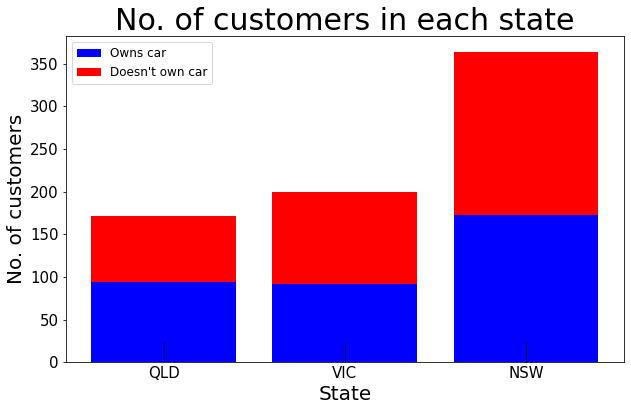

In [85]:
customers, states, owns_car = myfun('state', 'owns_car')

fig = plt.figure(figsize = (10, 6))
plt.bar(states, customers[0], color = 'blue')
plt.bar(states, customers[1], bottom = customers[0], color = 'red')
plt.xlabel('State', fontsize=20)
plt.ylabel('No. of customers', fontsize=20)
plt.legend(['Owns car', 'Doesn\'t own car'], fontsize=12)
plt.tick_params(axis = 'x', direction = 'in', length=20)
plt.xticks(fontsize = '15')
plt.yticks(fontsize = '15')
plt.title('No. of customers in each state', fontsize = 30);

In [86]:
new_cus['Age'] = 2022 - new_cus['DOB'].dt.year
new_cus['age'] = pd.cut(x = new_cus['Age'], bins = [0, 20, 40, 60, 80, 100], labels = ['under 20', '20-40', '40-60', '60-80', 'above 80'])

new_cus.drop(['DOB'], axis = 1, inplace = True)
new_cus.drop(['Age'], axis = 1, inplace = True)
new_cus

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Anthony,Morison,Male,7,General Manager,Health,Mass Customer,N,No,12,276 Derek Circle,2759,NSW,Australia,9,797,0.600000,above 80
1,Zachariah,Meininking,Male,40,Cost Accountant,Financial Services,Affluent Customer,N,Yes,20,24815 Lindbergh Avenue,2749,NSW,Australia,7,883,0.531250,above 80
3,Letizia,Poore,Female,27,Web Developer II,Manufacturing,Affluent Customer,N,No,15,95796 Mcbride Drive,3677,VIC,Australia,3,583,0.787500,above 80
7,Franklin,Wohler,Male,55,Clinical Specialist,Health,Mass Customer,N,Yes,7,6966 Delladonna Street,2250,NSW,Australia,8,191,1.150000,above 80
8,Odilia,Quick,Female,65,General Manager,Manufacturing,Affluent Customer,N,Yes,11,1550 Russell Way,2222,NSW,Australia,11,19,1.531250,above 80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,Ailyn,Howgate,Female,66,Electrical Engineer,Manufacturing,Mass Customer,N,Yes,2,197 Northport Plaza,4213,QLD,Australia,7,568,0.800000,20-40
978,Burk,Wortley,Male,22,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,20-40
979,Tomkin,Bernlin,Male,7,Food Chemist,Health,Affluent Customer,N,Yes,9,0492 Kings Street,2480,NSW,Australia,3,475,0.881875,20-40
980,Simmonds,Bapty,Male,52,Junior Executive,Financial Services,Affluent Customer,N,No,8,47 Susan Park,2025,NSW,Australia,12,760,0.637500,under 20


In [87]:
new1 = new_cus.groupby(['job_industry_category', 'wealth_segment', 'owns_car', 'state', 'age'])
new1.get_group(('Financial Services', 'Mass Customer', 'No', 'NSW', '40-60'))

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
383,Valerie,Pickover,Female,34,Editor,Financial Services,Mass Customer,N,No,9,92214 Spenser Road,2756,NSW,Australia,8,78,1.337500,40-60
402,Wylie,Huntingdon,Male,99,VP Quality Control,Financial Services,Mass Customer,N,No,15,08822 Duke Road,2763,NSW,Australia,8,676,0.701250,40-60
422,Donica,Humby,Female,47,Senior Cost Accountant,Financial Services,Mass Customer,N,No,4,488 Briar Crest Court,2101,NSW,Australia,12,871,0.541875,40-60
427,Mick,Macewan,Male,32,Senior Cost Accountant,Financial Services,Mass Customer,N,No,16,59254 Northland Alley,2032,NSW,Australia,10,206,1.137500,40-60
486,Daisi,Tinwell,Female,84,Business Systems Development Analyst,Financial Services,Mass Customer,N,No,11,19561 Express Street,2777,NSW,Australia,8,366,0.975000,40-60
493,Sammy,Borsi,Female,99,Accountant III,Financial Services,Mass Customer,N,No,5,0 Kipling Way,2289,NSW,Australia,7,546,0.823438,40-60
531,Inglebert,Aspinal,Male,4,Financial Analyst,Financial Services,Mass Customer,N,No,11,612 Annamark Center,2176,NSW,Australia,8,507,0.850000,40-60
569,Sunny,Christescu,Female,90,Cost Accountant,Financial Services,Mass Customer,N,No,11,6668 Blue Bill Park Plaza,2209,NSW,Australia,10,250,1.075000,40-60
578,Sonia,Dunstall,Female,0,Accountant III,Financial Services,Mass Customer,N,No,10,99 Park Meadow Hill,2570,NSW,Australia,9,960,0.442000,40-60
606,Rutledge,Hallt,Male,23,Compensation Analyst,Financial Services,Mass Customer,N,No,8,7 Nevada Crossing,2620,NSW,Australia,7,6,1.671875,40-60


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,140,11,462,2017-01-01,0.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,2016-07-09
1,517,77,311,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,2011-05-09
2,561,65,2298,2017-01-01,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,2010-08-20
3,1293,67,1931,2017-01-01,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
4,1403,0,2891,2017-01-01,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,1993-07-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,17394,20,933,2017-12-30,0.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,1996-04-05
19996,18609,27,2372,2017-12-30,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,1999-06-23
19997,19346,4,543,2017-12-30,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,2011-04-16
19998,19907,41,1721,2017-12-30,0.0,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,2005-12-07


In [89]:
new_cus.replace('NSW', 'New South Wales', inplace=True)
new_cus.replace('QLD', 'Queensland', inplace=True)
new_cus.replace('VIC', 'Victoria', inplace=True)

new_cus

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Anthony,Morison,Male,7,General Manager,Health,Mass Customer,N,No,12,276 Derek Circle,2759,New South Wales,Australia,9,797,0.600000,above 80
1,Zachariah,Meininking,Male,40,Cost Accountant,Financial Services,Affluent Customer,N,Yes,20,24815 Lindbergh Avenue,2749,New South Wales,Australia,7,883,0.531250,above 80
3,Letizia,Poore,Female,27,Web Developer II,Manufacturing,Affluent Customer,N,No,15,95796 Mcbride Drive,3677,Victoria,Australia,3,583,0.787500,above 80
7,Franklin,Wohler,Male,55,Clinical Specialist,Health,Mass Customer,N,Yes,7,6966 Delladonna Street,2250,New South Wales,Australia,8,191,1.150000,above 80
8,Odilia,Quick,Female,65,General Manager,Manufacturing,Affluent Customer,N,Yes,11,1550 Russell Way,2222,New South Wales,Australia,11,19,1.531250,above 80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,Ailyn,Howgate,Female,66,Electrical Engineer,Manufacturing,Mass Customer,N,Yes,2,197 Northport Plaza,4213,Queensland,Australia,7,568,0.800000,20-40
978,Burk,Wortley,Male,22,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,New South Wales,Australia,10,997,0.357000,20-40
979,Tomkin,Bernlin,Male,7,Food Chemist,Health,Affluent Customer,N,Yes,9,0492 Kings Street,2480,New South Wales,Australia,3,475,0.881875,20-40
980,Simmonds,Bapty,Male,52,Junior Executive,Financial Services,Affluent Customer,N,No,8,47 Susan Park,2025,New South Wales,Australia,12,760,0.637500,under 20


In [90]:
dem

,customer_id,first_name,last_name,gender,3_yrs_purchases,job_title,job_industry,wealth_segment,deceased_indicator,owns_car,tenure,age
1,720,Darrel,Canet,Male,67,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,above 80
2,1092,Katlin,Creddon,Female,56,VP Quality Control,Retail,Mass Customer,N,No,5.0,above 80
3,3410,Merrili,Brittin,Female,93,NaN,Property,Mass Customer,N,No,16.0,above 80
4,2413,Abbey,Murrow,Male,27,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0,60-80
5,658,Donn,Bonnell,Male,38,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0,60-80
...,...,...,...,...,...,...,...,...,...,...,...,...
3906,3949,Costa,Sleightholm,Male,24,Web Designer IV,Manufacturing,High Net Worth,N,Yes,1.0,20-40
3907,2296,Nathalia,Sanger,Female,16,Geologist IV,Retail,Affluent Customer,N,No,1.0,under 20
3908,422,Vito,Norker,Male,78,NaN,Manufacturing,Affluent Customer,N,No,1.0,under 20
3911,1888,Sibyl,Scholtz,Female,67,Food Chemist,Health,Mass Customer,N,Yes,1.0,under 20


In [91]:
address.replace('NSW', 'New South Wales', inplace=True)
address.replace('QLD', 'Queensland', inplace=True)
address.replace('VIC', 'Victoria', inplace=True)

address

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,Queensland,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,Victoria,Australia,9
...,...,...,...,...,...,...
3991,3996,0 Transport Center,3977,Victoria,Australia,6
3992,3997,4 Dovetail Crossing,2350,New South Wales,Australia,2
3993,3998,736 Roxbury Junction,2540,New South Wales,Australia,6
3994,3999,1482 Hauk Trail,3064,Victoria,Australia,3


In [92]:
with pd.ExcelWriter("KPMG.xlsx") as writer:
    tran.to_excel(writer, sheet_name="Transactions")
    new_cus.to_excel(writer, sheet_name="New Customer List")
    dem.to_excel(writer, sheet_name="Demographics")
    address.to_excel(writer, sheet_name="Customer Address")